In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings         # чтобы никто не мешал бесчинствам с кодом
warnings.filterwarnings("ignore")

In [3]:
'''
STEP 1: LOADING DATASET
'''
# Картинки 28 * 28
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())
class_names = train_dataset.classes # забираем метки классов

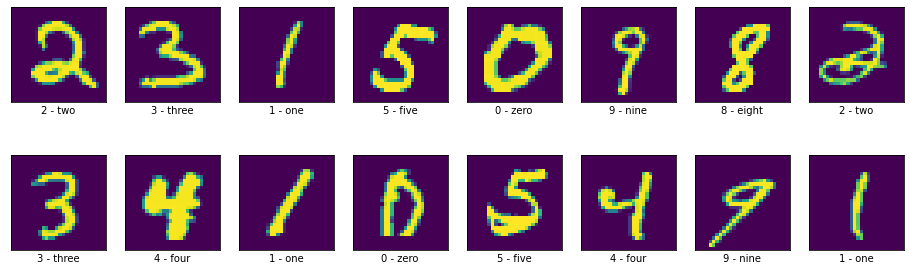

In [4]:
# отрисуем все что у нас есть
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_dataset))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(train_dataset[random_index][0][0])
        ax.set_xlabel(class_names[train_dataset[random_index][1]])
plt.show()

In [5]:
batch_size = 784
num_epochs = 10

In [6]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) 

In [7]:
'''
STEP 3: CREATE MODEL CLASS
'''

# если используем crossentropy loss, то softmax будет применен автоматически
class FeedforwardNeuralNetModel(nn.Module):
        def __init__(self, input_size, hidden_size, output_size: int = 10):
            super().__init__()
            self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
            self.activation = nn.LeakyReLU(negative_slope=0.01)
            self.batch_norm = nn.BatchNorm1d(num_features=hidden_size)
            self.linear2 =nn.Linear(in_features=hidden_size, out_features=hidden_size)
            self.dropout = nn.Dropout(p=0.2)
            self.linear3 =nn.Linear(in_features=hidden_size, out_features=output_size)
            self.softmax = nn.Softmax()
            
        def forward(self, x):
#           переопределенный метод forward в nn.Linear
            out = self.linear1(x) 
            out = self.activation(out)
        
            out = self.batch_norm(out)
            
            out = self.linear2(out)
            out = self.activation(out)
            
            out = self.dropout(out)
            
            out = self.linear3(out)
            return out


In [9]:
model = FeedforwardNeuralNetModel(784, 256, 10)

In [8]:
criterion = nn.CrossEntropyLoss()

In [11]:
learnig_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=learnig_rate)

In [14]:
for epoch in range(num_epochs):
    for data, labels in train_loader:
        data = data.view(-1, 28*28)
        
        optimizer.zero_grad()
    
        result = model(data)
        
        loss = criterion(result, labels)
        
        loss.backward()
    
    model.eval()
    correct = 0
    total = 0
    for data, labels in test_loader:
        data = data.view(-1, 28*28)
        
        result = model(data)
        
        result_labels = torch.argmax(result, dim=1)
        
        correct += (result_labels == labels).sum().item()
        total += labels.size(0)
        
    print(f'EPOCH = {epoch}, TEST_ACCURACY = {correct / total}')

EPOCH = 0, TEST_ACCURACY = 0.0947
EPOCH = 1, TEST_ACCURACY = 0.0947
EPOCH = 2, TEST_ACCURACY = 0.0947
EPOCH = 3, TEST_ACCURACY = 0.0947
EPOCH = 4, TEST_ACCURACY = 0.0947
EPOCH = 5, TEST_ACCURACY = 0.0947
EPOCH = 6, TEST_ACCURACY = 0.0947
EPOCH = 7, TEST_ACCURACY = 0.0947
EPOCH = 8, TEST_ACCURACY = 0.0947
EPOCH = 9, TEST_ACCURACY = 0.0947
